In [1]:
#import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from config import spotify_api_key

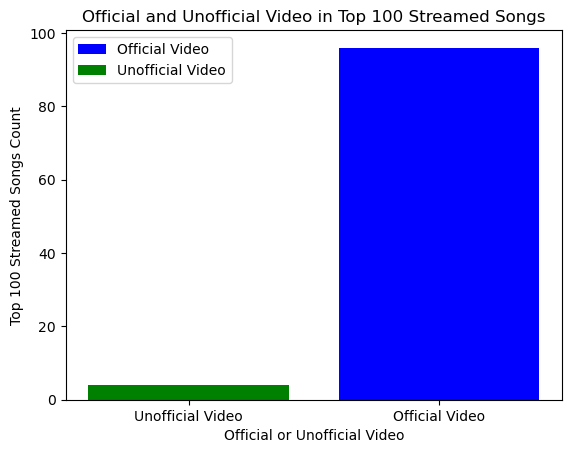

In [78]:
#offical video success against non official videos - compared to spotify track - Keval
df = spot_yt_df[["Artist", "Track", "Stream", "Views", "official_video", "Combined Views and Streams"]]

official_video_df = df.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views','official_video':'Official Video'})

official_sorted_stream = official_video_df.sort_values(by = "Youtube Views", ascending = False).reset_index(drop=True)

top_100_streamed_songs = official_sorted_stream.head(100)

# Count the occurrences of 'Official Video' values
true_false_count = top_100_streamed_songs["Official Video"].value_counts().reset_index()


# Create a bar plot with two bars for 'Official Songs' and 'Non-Official Songs'
bars = plt.bar(true_false_count["index"], true_false_count["Official Video"], color=['blue', 'green'], \
               width=0.8, align='center')

# Set the legend labels for each bar
bars[0].set_label("Official Video")
bars[1].set_label("Unofficial Video")

# Create the legend
plt.legend()

# Modify the tick labels to match the legend labels
tick_location = [value for value in true_false_count["index"]]
plt.xticks(tick_location, ["Official Video", "Unofficial Video"])

plt.title("Official and Unofficial Video in Top 100 Streamed Songs")
plt.ylabel("Top 100 Streamed Songs Count")
plt.xlabel("Official or Unofficial Video")

plt.show()



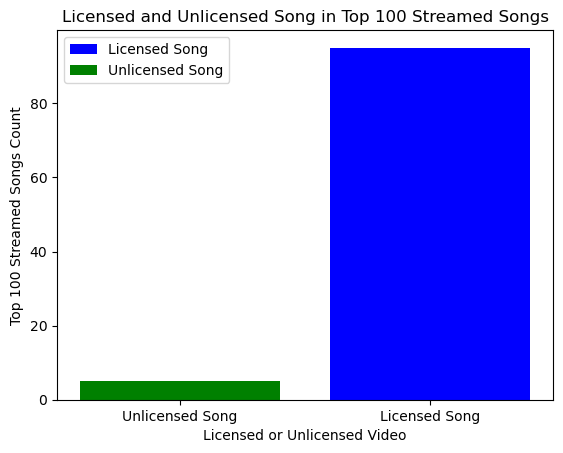

In [76]:
#Licensed song success against unLicensed video - compared to spotify track - Anyone
licensed_song = spot_yt_df[["Artist", "Track", "Stream", "Views", "Licensed","Combined Views and Streams"]]

licensed_song_df = licensed_song.rename(columns={'Stream': 'Spotify Stream','Views':'Youtube Views'})
licensed_sorted_stream = licensed_song_df.sort_values(by = "Combined Views and Streams", ascending = False).reset_index(drop=True)

top_100_licensed_unlicensed_songs = licensed_sorted_stream.head(100)

true_false_count_licensed = top_100_licensed_unlicensed_songs["Licensed"].value_counts().reset_index()
bars = plt.bar(true_false_count_licensed["index"], true_false_count_licensed["Licensed"], color=['blue', 'green'], width=0.8, align='center')

# Set the legend labels for each bar
bars[0].set_label("Licensed Song")
bars[1].set_label("Unlicensed Song")

# Create the legend
plt.legend()

# Modify the tick labels to match the legend labels
tick_location = [value for value in true_false_count_licensed["index"]]
plt.xticks(tick_location, ["Licensed Song", "Unlicensed Song"])

plt.title("Licensed and Unlicensed Song in Top 100 Streamed Songs")
plt.ylabel("Top 100 Streamed Songs Count")
plt.xlabel("Licensed or Unlicensed Video")

plt.show()


In [13]:
#API: Genre against popularity for Spotify - Keval

top_100_songs_for_API = spot_yt_df[["Artist", "Track","Url_spotify","Album", "Stream", "Spotify Rank"]]\
.sort_values(by="Stream", ascending=False).reset_index(drop=True).head(100)


get_artist_id = top_100_songs_for_API["Url_spotify"].str.split("/")

artist_df = pd.DataFrame({"artist_data": get_artist_id})
artist_id= []
for row in artist_df["artist_data"]:
#     if row[4] not in artist_id:
    artist_id.append(row[4])
        
artist_id_df = pd.DataFrame({"Artist": top_100_songs_for_API["Artist"],"Artist ID":artist_id})
followers = []
# Replace 'YOUR_ACCESS_TOKEN' with your actual Spotify access token

# Spotify API endpoint for the artist


# Set the headers with the Authorization token
headers = {
    "Authorization": f"Bearer {spotify_api_key}"
}

for index, row in artist_id_df.iterrows():
    url = "https://api.spotify.com/v1/artists/{}".format(row[1])
    

# Make the GET request
    response = requests.get(url, headers=headers).json()
    
    followers.append(response["followers"]["total"])
    
artist_followers_df = pd.DataFrame({"Artist": top_100_songs_for_API["Artist"],"Artist ID":artist_id,"Followers":followers})
artist_followers_df

,Artist,Artist ID,Followers
0,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,71889644
1,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,115208627
2,Lewis Capaldi,4GNC7GD6oZMSxPGyXy4MNB,11692506
3,Post Malone,246dkjvS1zLTtiykXe5h60,42177295
4,Post Malone,246dkjvS1zLTtiykXe5h60,42177295
...,...,...,...
95,XXXTENTACION,15UsOTVnJzReFVN1VCnxy4,43142517
96,Oasis,2DaxqgrOhkeH0fpeiQq2f4,9198231
97,Roddy Ricch,757aE44tKEUQEqRuT6GnEB,9826208
98,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,51167524


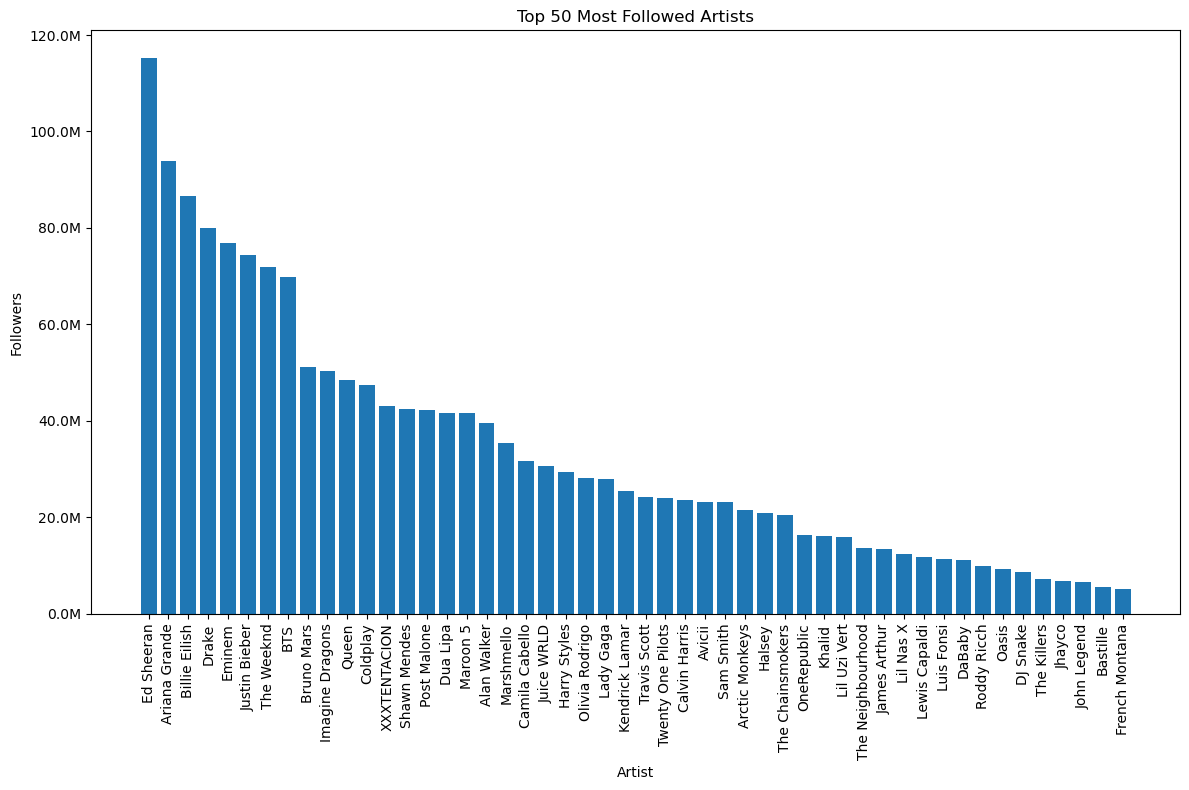

In [44]:

merged_df = pd.merge(top_100_songs_for_API, artist_followers_df, on='Artist',how='left').drop_duplicates().reset_index(drop=True)


unique_merged_df = merged_df.drop_duplicates().reset_index(drop=True)

most_followed_artists = unique_merged_df[["Artist","Followers"]].sort_values(by="Followers", ascending=False)
unique_most_followed_artists = most_followed_artists.drop_duplicates().reset_index(drop=True)

pd.options.display.float_format = '{:.0f}'.format
sorted_unique_artist_followers = unique_most_followed_artists.sort_values(by="Followers", ascending=False).head(50)
# .plot(kind="bar",fontsize=25,figsize=(30,30))

def billions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'  # Format numbers in billions with one decimal place

# Create a bar chart
plt.figure(figsize=(12, 8))  # Set the figure size (adjust as needed)
plt.bar(sorted_unique_artist_followers["Artist"], sorted_unique_artist_followers['Followers'])
plt.xlabel("Artist")
plt.ylabel("Followers")
plt.title("Top 50 Most Followed Artists")


# Use the custom billions_formatter function for y-axis labels
y_formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Rotate x-axis labels for better readability (adjust rotation angle as needed)
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()
# grouped_df.sort_values(by="Stream", ascending=False)

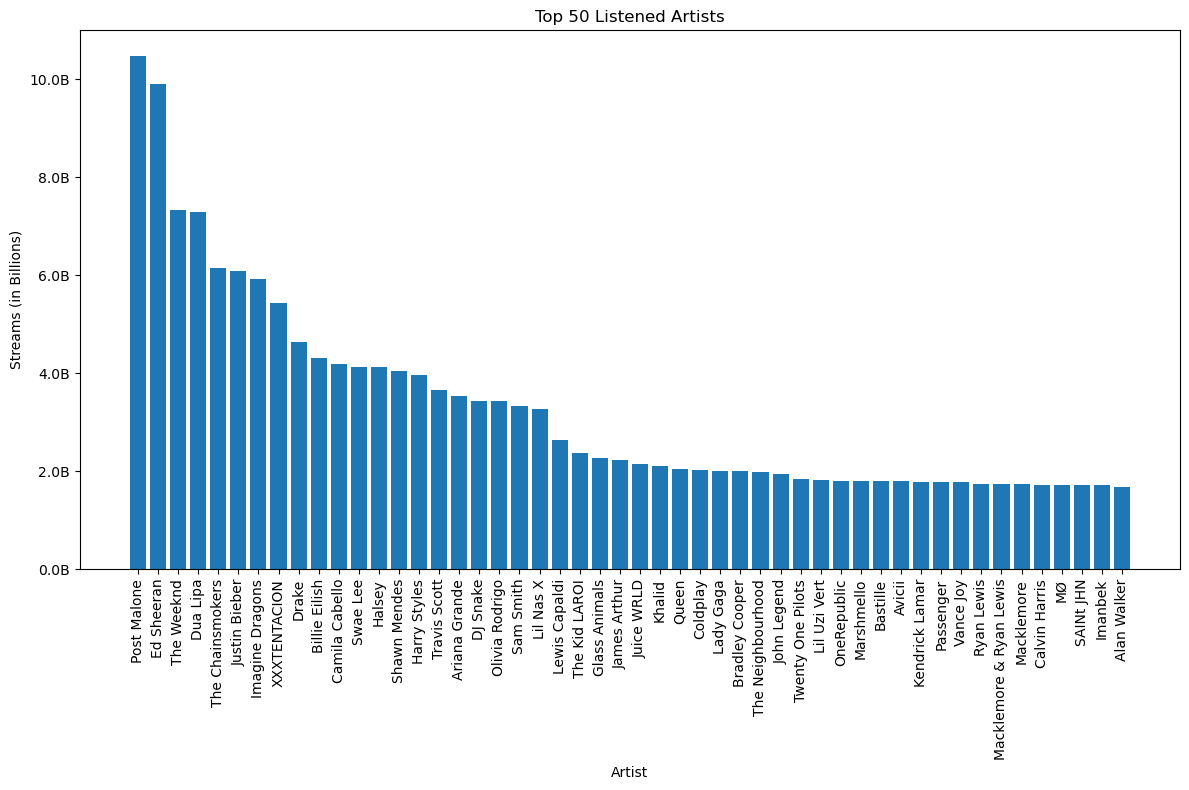

In [43]:
Top_listened_artists = unique_merged_df[["Artist","Stream", "Followers"]].sort_values(by="Stream", ascending=False)
groupby_artists = pd.DataFrame(Top_listened_artists.groupby(by="Artist")["Stream"].sum())
groupby_artists.sort_values(by="Stream", ascending=False).drop_duplicates().reset_index(drop=True).head(50)

pd.options.display.float_format = '{:.0f}'.format
groupby_50_artists = groupby_artists.sort_values(by="Stream", ascending=False).head(50)
# .plot(kind="bar",fontsize=25,figsize=(30,30))

def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'  # Format numbers in billions with one decimal place

# Create a bar chart
plt.figure(figsize=(12, 8))  # Set the figure size (adjust as needed)
plt.bar(groupby_50_artists.index, groupby_50_artists['Stream'])
plt.xlabel("Artist")
plt.ylabel("Streams (in Billions)")
plt.title("Top 50 Listened Artists")


# Use the custom billions_formatter function for y-axis labels
y_formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(y_formatter)

# Rotate x-axis labels for better readability (adjust rotation angle as needed)
plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()